# Problem set: Jupyter, pyplot and numpy

<div class="alert alert-block alert-info">The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.</div><br>
The dataset contains five variables: *sepal length*, *sepal width*, *petal length*, *petal width*, and *species*.<br>
Each row of the table represents an iris flower, including its species and dimensions of its botanical parts, sepal and petal, in centimeters.

Adapted from: *https://en.wikipedia.org/wiki/Iris_flower_data_set*

In [2]:
# numpy efficiently deals with numerical multi-dimensional arrays.
import numpy as np

# matplotlib is a plotting library, and pyplot is its easy-to-use module.
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches

# This just sets the default plot size to be bigger.
pl.rcParams['figure.figsize'] = (16.0, 8.0)

In [3]:
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.genfromtxt.html
sepal_length = np.genfromtxt('IRIS.csv', delimiter=',', usecols=(0))
sepal_width = np.genfromtxt('IRIS.csv', delimiter=',', usecols=(1))
petal_length = np.genfromtxt('IRIS.csv', delimiter=',', usecols=(2))
petal_width = np.genfromtxt('IRIS.csv', delimiter=',', usecols=(3))
species = np.genfromtxt('IRIS.csv', delimiter=',', usecols=(4), dtype=None)

<div class="alert alert-block alert-info">Finding the best fit for sepal_length and sepal_width</div>

In [4]:
m, c = np.polyfit(sepal_length, sepal_width, 1)
print("Best fit is m = %f and c = %f" % (m, c))

Best fit is m = -0.062975 and c = 3.424917


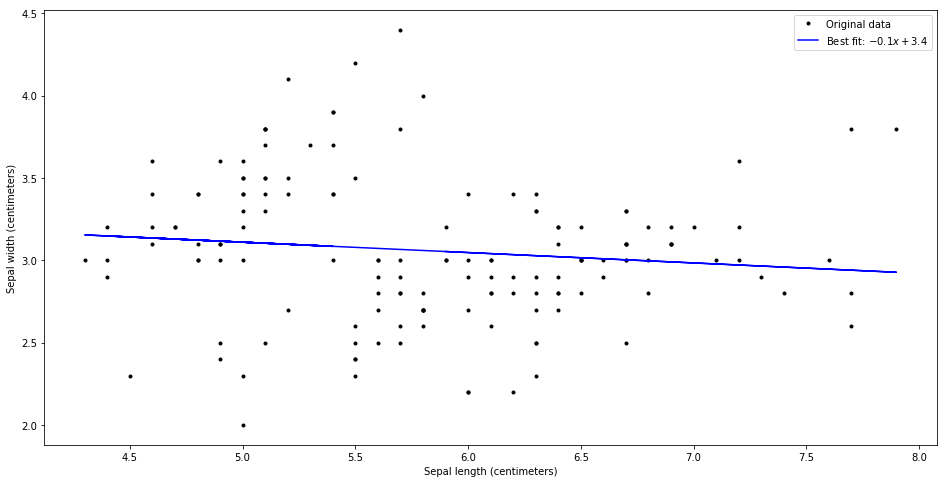

In [5]:
pl.plot(sepal_length, sepal_width, 'k.', label='Original data')
pl.plot(sepal_length, m * sepal_length + c, 'b-', label='Best fit: $%0.1f x + %0.1f$' % (m,c))
pl.xlabel('Sepal length (centimeters)')
pl.ylabel('Sepal width (centimeters)')
pl.legend()
pl.show()

In [6]:
dataset = np.genfromtxt('IRIS.csv', delimiter=',', dtype=None)
flower_type = [x[4] for x in dataset]

In [7]:
for i in range(0,len(dataset)-1):
    x, y = [dataset[i][0], dataset[i][1]]
    scale = 100.0
    # determine color
    flower = flower_type[i].decode("utf-8")
    color = ""
    if flower == "I.setosa":
        color = "red"
    elif flower == "I.versicolor":
        color = "green"
    elif flower == "I.virginica":
        color = "blue"

    pl.scatter(x, y, s=scale, c=color, alpha=1, edgecolor="none")

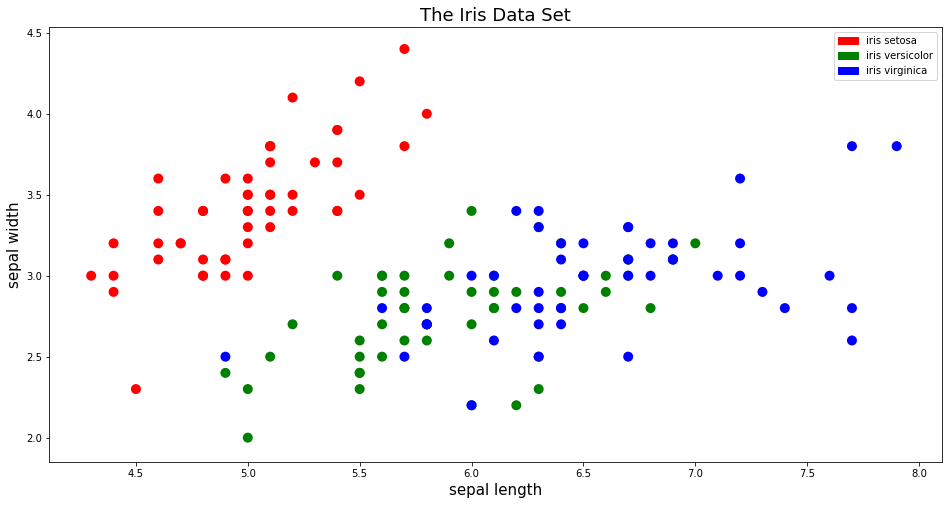

In [8]:
# Legend
red_patch = mpatches.Patch(color='red', label='iris setosa')
green_patch = mpatches.Patch(color='green', label='iris versicolor')
blue_patch = mpatches.Patch(color='blue', label='iris virginica')
pl.legend(handles=[red_patch, green_patch, blue_patch])

pl.title("The Iris Data Set", fontsize=18)
pl.xlabel(r'sepal length', fontsize=15)
pl.ylabel(r'sepal width', fontsize=15)

pl.show()

<div class="alert alert-block alert-info">Scatterplot matrix of all five variables using seaborn library</div>

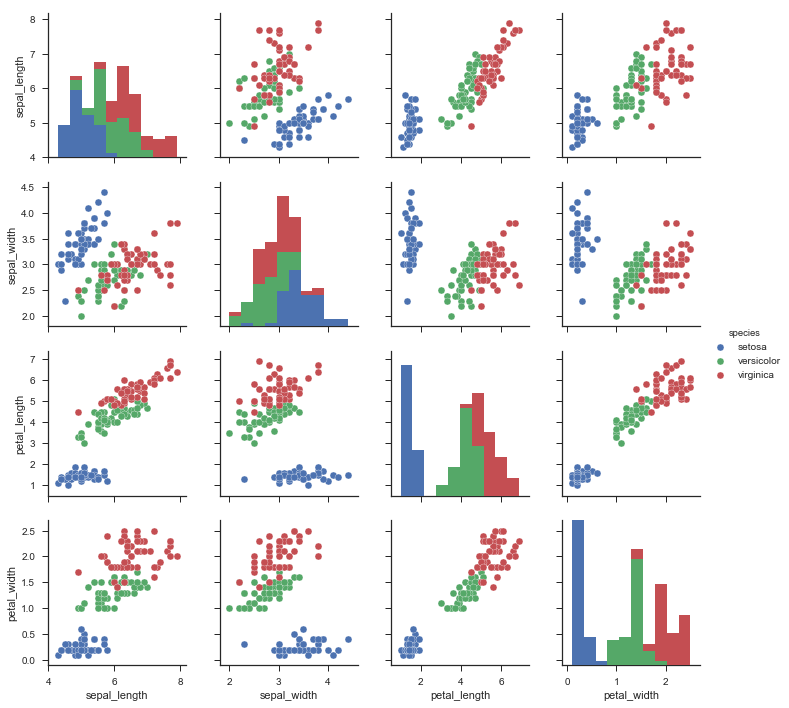

In [12]:
import seaborn as sns
sns.set(style="ticks")

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")
pl.show()

<div class="alert alert-block alert-info">The R squared value of the best fit line</div>

In [19]:
# Find a cost function

def grad_m(x, y, m, c):
  return -2.0 * np.sum(x * (y - m * x - c))

def grad_c(x, y, m , c):
  return -2.0 * np.sum(y - m * x - c)

In [21]:
eta = 0.0001
m, c = 1.0, 1.0
change = True

while change:
  mnew = m - eta * grad_m(sepal_length, sepal_width, m, c)
  cnew = c - eta * grad_c(sepal_length, sepal_width, m, c)
  if m == mnew and c == cnew:
    change = False
  else:
    m, c = mnew, cnew
    print("m: %20.16f  c: %20.16f" % (m, c))

m:   0.3233940000000001  c:   0.8875600000000000
m:   0.3652000310720000  c:   0.8960377705600000
m:   0.3623510135648527  c:   0.8969986875982413
m:   0.3622778114844832  c:   0.8984260145907849
m:   0.3620322083731279  c:   0.8998235268324357
m:   0.3617974599356196  c:   0.9012220692059144
m:   0.3615621752533792  c:   0.9026197249051650
m:   0.3613270622885393  c:   0.9040166135309639
m:   0.3610920769588193  c:   0.9054127281044846
m:   0.3608572219276961  c:   0.9068080695146065
m:   0.3606224969530576  c:   0.9082026381609147
m:   0.3603879019734404  c:   0.9095964344731562
m:   0.3601534369161945  c:   0.9109894588789511
m:   0.3599191017094077  c:   0.9123817118058004
m:   0.3596848962811641  c:   0.9137731936809609
m:   0.3594508205595905  c:   0.9151639049314532
m:   0.3592168744728534  c:   0.9165538459840614
m:   0.3589830579491589  c:   0.9179430172653333
m:   0.3587493709167530  c:   0.9193314192015806
m:   0.3585158133039212  c:   0.9207190522188785
m:   0.3582823850389

m:   0.0725653150010570  c:   2.6196332856146971
m:   0.0724902506442754  c:   2.6200792645687954
m:   0.0724152278593217  c:   2.6205249965326960
m:   0.0723402466231727  c:   2.6209704816431860
m:   0.0722653069128181  c:   2.6214157200369765
m:   0.0721904087052603  c:   2.6218607118507036
m:   0.0721155519775142  c:   2.6223054572209268
m:   0.0720407367066078  c:   2.6227499562841303
m:   0.0719659628695816  c:   2.6231942091767229
m:   0.0718912304434890  c:   2.6236382160350380
m:   0.0718165394053957  c:   2.6240819769953334
m:   0.0717418897323805  c:   2.6245254921937908
m:   0.0716672814015348  c:   2.6249687617665174
m:   0.0715927143899626  c:   2.6254117858495443
m:   0.0715181886747807  c:   2.6258545645788280
m:   0.0714437042331185  c:   2.6262970980902489
m:   0.0713692610421180  c:   2.6267393865196129
m:   0.0712948590789339  c:   2.6271814300026501
m:   0.0712204983207336  c:   2.6276232286750156
m:   0.0711461787446973  c:   2.6280647826722894
m:   0.0710719003280

m:  -0.0336275179081845  c:   3.2505554780392432
m:  -0.0336437709947047  c:   3.2506520423053997
m:  -0.0336600150800085  c:   3.2507485530927389
m:  -0.0336762501690811  c:   3.2508450104308775
m:  -0.0336924762669045  c:   3.2509414143494166
m:  -0.0337086933784583  c:   3.2510377648779412
m:  -0.0337249015087192  c:   3.2511340620460194
m:  -0.0337411006626614  c:   3.2512303058832033
m:  -0.0337572908452559  c:   3.2513264964190278
m:  -0.0337734720614712  c:   3.2514226336830125
m:  -0.0337896443162731  c:   3.2515187177046601
m:  -0.0338058076146246  c:   3.2516147485134570
m:  -0.0338219619614858  c:   3.2517107261388731
m:  -0.0338381073618142  c:   3.2518066506103627
m:  -0.0338542438205646  c:   3.2519025219573625
m:  -0.0338703713426889  c:   3.2519983402092945
m:  -0.0338864899331364  c:   3.2520941053955630
m:  -0.0339025995968536  c:   3.2521898175455570
m:  -0.0339187003387843  c:   3.2522854766886486
m:  -0.0339347921638695  c:   3.2523810828541939
m:  -0.0339508750770

m:  -0.0562288286168305  c:   3.3848363717051497
m:  -0.0562325647400497  c:   3.3848585690887969
m:  -0.0562362987941448  c:   3.3848807541791817
m:  -0.0562400307802617  c:   3.3849029269831128
m:  -0.0562437606995457  c:   3.3849250875073942
m:  -0.0562474885531414  c:   3.3849472357588271
m:  -0.0562512143421928  c:   3.3849693717442078
m:  -0.0562549380678433  c:   3.3849914954703300
m:  -0.0562586597312357  c:   3.3850136069439825
m:  -0.0562623793335120  c:   3.3850357061719514
m:  -0.0562660968758137  c:   3.3850577931610184
m:  -0.0562698123592818  c:   3.3850798679179612
m:  -0.0562735257850563  c:   3.3851019304495549
m:  -0.0562772371542769  c:   3.3851239807625695
m:  -0.0562809464680825  c:   3.3851460188637721
m:  -0.0562846537276115  c:   3.3851680447599257
m:  -0.0562883589340015  c:   3.3851900584577899
m:  -0.0562920620883897  c:   3.3852120599641200
m:  -0.0562957631919124  c:   3.3852340492856676
m:  -0.0562994622457054  c:   3.3852560264291816
m:  -0.0563031592509

m:  -0.0615837864505880  c:   3.4166517178472273
m:  -0.0615845569134725  c:   3.4166562953890343
m:  -0.0615853269496624  c:   3.4166608703957260
m:  -0.0615860965593941  c:   3.4166654428687067
m:  -0.0615868657429037  c:   3.4166700128093797
m:  -0.0615876345004274  c:   3.4166745802191469
m:  -0.0615884028322009  c:   3.4166791450994105
m:  -0.0615891707384602  c:   3.4166837074515715
m:  -0.0615899382194409  c:   3.4166882672770296
m:  -0.0615907052753784  c:   3.4166928245771842
m:  -0.0615914719065083  c:   3.4166973793534337
m:  -0.0615922381130656  c:   3.4167019316071761
m:  -0.0615930038952857  c:   3.4167064813398085
m:  -0.0615937692534035  c:   3.4167110285527271
m:  -0.0615945341876539  c:   3.4167155732473273
m:  -0.0615952986982715  c:   3.4167201154250035
m:  -0.0615960627854911  c:   3.4167246550871502
m:  -0.0615968264495471  c:   3.4167291922351599
m:  -0.0615975896906739  c:   3.4167337268704254
m:  -0.0615983525091057  c:   3.4167382589943380
m:  -0.0615991149050

m:  -0.0626630546698884  c:   3.4230639610512208
m:  -0.0626632274169648  c:   3.4230649873913341
m:  -0.0626634000683711  c:   3.4230660131630444
m:  -0.0626635726241604  c:   3.4230670383666659
m:  -0.0626637450843855  c:   3.4230680630025132
m:  -0.0626639174490994  c:   3.4230690870709011
m:  -0.0626640897183550  c:   3.4230701105721439
m:  -0.0626642618922052  c:   3.4230711335065553
m:  -0.0626644339707028  c:   3.4230721558744497
m:  -0.0626646059539006  c:   3.4230731776761405
m:  -0.0626647778418514  c:   3.4230741989119413
m:  -0.0626649496346079  c:   3.4230752195821657
m:  -0.0626651213322229  c:   3.4230762396871266
m:  -0.0626652929347490  c:   3.4230772592271372
m:  -0.0626654644422389  c:   3.4230782782025106
m:  -0.0626656358547453  c:   3.4230792966135595
m:  -0.0626658071723207  c:   3.4230803144605959
m:  -0.0626659783950177  c:   3.4230813317439326
m:  -0.0626661495228889  c:   3.4230823484638817
m:  -0.0626663205559868  c:   3.4230833646207550
m:  -0.0626664914943

m:  -0.0629087718778483  c:   3.4245238377238301
m:  -0.0629088085428490  c:   3.4245240555611547
m:  -0.0629088451875440  c:   3.4245242732778376
m:  -0.0629088818119446  c:   3.4245244908739458
m:  -0.0629089184160621  c:   3.4245247083495456
m:  -0.0629089549999076  c:   3.4245249257047039
m:  -0.0629089915634924  c:   3.4245251429394878
m:  -0.0629090281068277  c:   3.4245253600539636
m:  -0.0629090646299248  c:   3.4245255770481977
m:  -0.0629091011327947  c:   3.4245257939222573
m:  -0.0629091376154489  c:   3.4245260106762085
m:  -0.0629091740778983  c:   3.4245262273101180
m:  -0.0629092105201543  c:   3.4245264438240519
m:  -0.0629092469422279  c:   3.4245266602180773
m:  -0.0629092833441305  c:   3.4245268764922603
m:  -0.0629093197258731  c:   3.4245270926466671
m:  -0.0629093560874669  c:   3.4245273086813643
m:  -0.0629093924289232  c:   3.4245275245964177
m:  -0.0629094287502528  c:   3.4245277403918943
m:  -0.0629094650514672  c:   3.4245279560678599
m:  -0.0629095013325

m:  -0.0629624538601044  c:   3.4248427778350492
m:  -0.0629624607951744  c:   3.4248428190382967
m:  -0.0629624677264037  c:   3.4248428602187251
m:  -0.0629624746537943  c:   3.4248429013763468
m:  -0.0629624815773484  c:   3.4248429425111748
m:  -0.0629624884970681  c:   3.4248429836232219
m:  -0.0629624954129555  c:   3.4248430247125006
m:  -0.0629625023250129  c:   3.4248430657790232
m:  -0.0629625092332422  c:   3.4248431068228027
m:  -0.0629625161376457  c:   3.4248431478438515
m:  -0.0629625230382254  c:   3.4248431888421820
m:  -0.0629625299349835  c:   3.4248432298178071
m:  -0.0629625368279220  c:   3.4248432707707392
m:  -0.0629625437170431  c:   3.4248433117009909
m:  -0.0629625506023489  c:   3.4248433526085749
m:  -0.0629625574838415  c:   3.4248433934935036
m:  -0.0629625643615230  c:   3.4248434343557896
m:  -0.0629625712353956  c:   3.4248434751954453
m:  -0.0629625781054612  c:   3.4248435160124835
m:  -0.0629625849717222  c:   3.4248435568069162
m:  -0.0629625918341

m:  -0.0629725812506938  c:   3.4249029475781398
m:  -0.0629725825770548  c:   3.4249029554584318
m:  -0.0629725839026811  c:   3.4249029633343597
m:  -0.0629725852275733  c:   3.4249029712059258
m:  -0.0629725865517318  c:   3.4249029790731322
m:  -0.0629725878751569  c:   3.4249029869359817
m:  -0.0629725891978490  c:   3.4249029947944769
m:  -0.0629725905198087  c:   3.4249030026486196
m:  -0.0629725918410362  c:   3.4249030104984128
m:  -0.0629725931615320  c:   3.4249030183438585
m:  -0.0629725944812965  c:   3.4249030261849591
m:  -0.0629725958003301  c:   3.4249030340217175
m:  -0.0629725971186332  c:   3.4249030418541357
m:  -0.0629725984362062  c:   3.4249030496822161
m:  -0.0629725997530495  c:   3.4249030575059614
m:  -0.0629726010691635  c:   3.4249030653253736
m:  -0.0629726023845486  c:   3.4249030731404555
m:  -0.0629726036992053  c:   3.4249030809512089
m:  -0.0629726050131338  c:   3.4249030887576368
m:  -0.0629726063263347  c:   3.4249030965597416
m:  -0.0629726076388

m:  -0.0629743796230051  c:   3.4249136322257789
m:  -0.0629743799533990  c:   3.4249136341887443
m:  -0.0629743802836099  c:   3.4249136361506225
m:  -0.0629743806136380  c:   3.4249136381114140
m:  -0.0629743809434832  c:   3.4249136400711198
m:  -0.0629743812731459  c:   3.4249136420297401
m:  -0.0629743816026259  c:   3.4249136439872756
m:  -0.0629743819319234  c:   3.4249136459437270
m:  -0.0629743822610385  c:   3.4249136478990949
m:  -0.0629743825899714  c:   3.4249136498533801
m:  -0.0629743829187222  c:   3.4249136518065830
m:  -0.0629743832472909  c:   3.4249136537587042
m:  -0.0629743835756776  c:   3.4249136557097439
m:  -0.0629743839038824  c:   3.4249136576597032
m:  -0.0629743842319055  c:   3.4249136596085825
m:  -0.0629743845597468  c:   3.4249136615563827
m:  -0.0629743848874067  c:   3.4249136635031041
m:  -0.0629743852148850  c:   3.4249136654487473
m:  -0.0629743855421820  c:   3.4249136673933132
m:  -0.0629743858692978  c:   3.4249136693368021
m:  -0.0629743861962

m:  -0.0629748506959907  c:   3.4249164310060043
m:  -0.0629748507654969  c:   3.4249164314189606
m:  -0.0629748508349646  c:   3.4249164318316883
m:  -0.0629748509043938  c:   3.4249164322441872
m:  -0.0629748509737846  c:   3.4249164326564578
m:  -0.0629748510431369  c:   3.4249164330685002
m:  -0.0629748511124509  c:   3.4249164334803144
m:  -0.0629748511817264  c:   3.4249164338919003
m:  -0.0629748512509636  c:   3.4249164343032583
m:  -0.0629748513201625  c:   3.4249164347143886
m:  -0.0629748513893230  c:   3.4249164351252914
m:  -0.0629748514584452  c:   3.4249164355359665
m:  -0.0629748515275292  c:   3.4249164359464142
m:  -0.0629748515965749  c:   3.4249164363566345
m:  -0.0629748516655823  c:   3.4249164367666274
m:  -0.0629748517345515  c:   3.4249164371763934
m:  -0.0629748518034826  c:   3.4249164375859324
m:  -0.0629748518723754  c:   3.4249164379952446
m:  -0.0629748519412301  c:   3.4249164384043302
m:  -0.0629748520100467  c:   3.4249164388131894
m:  -0.0629748520788

m:  -0.0629749477471318  c:   3.4249170076147739
m:  -0.0629749477628895  c:   3.4249170077083955
m:  -0.0629749477786386  c:   3.4249170078019651
m:  -0.0629749477943789  c:   3.4249170078954827
m:  -0.0629749478101105  c:   3.4249170079889484
m:  -0.0629749478258333  c:   3.4249170080823625
m:  -0.0629749478415475  c:   3.4249170081757248
m:  -0.0629749478572529  c:   3.4249170082690354
m:  -0.0629749478729497  c:   3.4249170083622946
m:  -0.0629749478886378  c:   3.4249170084555018
m:  -0.0629749479043172  c:   3.4249170085486575
m:  -0.0629749479199879  c:   3.4249170086417617
m:  -0.0629749479356499  c:   3.4249170087348144
m:  -0.0629749479513032  c:   3.4249170088278156
m:  -0.0629749479669479  c:   3.4249170089207652
m:  -0.0629749479825840  c:   3.4249170090136634
m:  -0.0629749479982113  c:   3.4249170091065100
m:  -0.0629749480138300  c:   3.4249170091993051
m:  -0.0629749480294401  c:   3.4249170092920491
m:  -0.0629749480450415  c:   3.4249170093847416
m:  -0.0629749480606

m:  -0.0629749702639465  c:   3.4249171413936530
m:  -0.0629749702672341  c:   3.4249171414131854
m:  -0.0629749702705199  c:   3.4249171414327071
m:  -0.0629749702738038  c:   3.4249171414522182
m:  -0.0629749702770860  c:   3.4249171414717181
m:  -0.0629749702803663  c:   3.4249171414912074
m:  -0.0629749702836448  c:   3.4249171415106860
m:  -0.0629749702869215  c:   3.4249171415301536
m:  -0.0629749702901963  c:   3.4249171415496105
m:  -0.0629749702934694  c:   3.4249171415690567
m:  -0.0629749702967406  c:   3.4249171415884923
m:  -0.0629749703000101  c:   3.4249171416079167
m:  -0.0629749703032777  c:   3.4249171416273305
m:  -0.0629749703065435  c:   3.4249171416467337
m:  -0.0629749703098075  c:   3.4249171416661262
m:  -0.0629749703130697  c:   3.4249171416855075
m:  -0.0629749703163300  c:   3.4249171417048783
m:  -0.0629749703195886  c:   3.4249171417242383
m:  -0.0629749703228454  c:   3.4249171417435877
m:  -0.0629749703261003  c:   3.4249171417629265
m:  -0.0629749703293

m:  -0.0629749748506522  c:   3.4249171686445918
m:  -0.0629749748513996  c:   3.4249171686490323
m:  -0.0629749748521466  c:   3.4249171686534705
m:  -0.0629749748528932  c:   3.4249171686579061
m:  -0.0629749748536393  c:   3.4249171686623390
m:  -0.0629749748543851  c:   3.4249171686667697
m:  -0.0629749748551304  c:   3.4249171686711977
m:  -0.0629749748558753  c:   3.4249171686756235
m:  -0.0629749748566198  c:   3.4249171686800466
m:  -0.0629749748573638  c:   3.4249171686844675
m:  -0.0629749748581075  c:   3.4249171686888857
m:  -0.0629749748588508  c:   3.4249171686933018
m:  -0.0629749748595936  c:   3.4249171686977151
m:  -0.0629749748603360  c:   3.4249171687021263
m:  -0.0629749748610781  c:   3.4249171687065347
m:  -0.0629749748618197  c:   3.4249171687109410
m:  -0.0629749748625609  c:   3.4249171687153446
m:  -0.0629749748633017  c:   3.4249171687197459
m:  -0.0629749748640421  c:   3.4249171687241446
m:  -0.0629749748647820  c:   3.4249171687285411
m:  -0.0629749748655

m:  -0.0629749758897977  c:   3.4249171748184541
m:  -0.0629749758899696  c:   3.4249171748194756
m:  -0.0629749758901414  c:   3.4249171748204965
m:  -0.0629749758903131  c:   3.4249171748215166
m:  -0.0629749758904847  c:   3.4249171748225362
m:  -0.0629749758906563  c:   3.4249171748235554
m:  -0.0629749758908277  c:   3.4249171748245737
m:  -0.0629749758909990  c:   3.4249171748255915
m:  -0.0629749758911702  c:   3.4249171748266090
m:  -0.0629749758913414  c:   3.4249171748276259
m:  -0.0629749758915125  c:   3.4249171748286420
m:  -0.0629749758916834  c:   3.4249171748296576
m:  -0.0629749758918542  c:   3.4249171748306728
m:  -0.0629749758920250  c:   3.4249171748316876
m:  -0.0629749758921957  c:   3.4249171748327014
m:  -0.0629749758923663  c:   3.4249171748337148
m:  -0.0629749758925367  c:   3.4249171748347278
m:  -0.0629749758927071  c:   3.4249171748357399
m:  -0.0629749758928774  c:   3.4249171748367515
m:  -0.0629749758930476  c:   3.4249171748377627
m:  -0.0629749758932

m:  -0.0629749761362874  c:   3.4249171762829205
m:  -0.0629749761363228  c:   3.4249171762831305
m:  -0.0629749761363581  c:   3.4249171762833406
m:  -0.0629749761363934  c:   3.4249171762835506
m:  -0.0629749761364288  c:   3.4249171762837607
m:  -0.0629749761364641  c:   3.4249171762839703
m:  -0.0629749761364994  c:   3.4249171762841799
m:  -0.0629749761365346  c:   3.4249171762843895
m:  -0.0629749761365699  c:   3.4249171762845991
m:  -0.0629749761366052  c:   3.4249171762848083
m:  -0.0629749761366403  c:   3.4249171762850175
m:  -0.0629749761366755  c:   3.4249171762852266
m:  -0.0629749761367107  c:   3.4249171762854358
m:  -0.0629749761367459  c:   3.4249171762856445
m:  -0.0629749761367810  c:   3.4249171762858532
m:  -0.0629749761368161  c:   3.4249171762860620
m:  -0.0629749761368512  c:   3.4249171762862707
m:  -0.0629749761368864  c:   3.4249171762864790
m:  -0.0629749761369214  c:   3.4249171762866872
m:  -0.0629749761369564  c:   3.4249171762868955
m:  -0.0629749761369

m:  -0.0629749761874138  c:   3.4249171765866775
m:  -0.0629749761874209  c:   3.4249171765867197
m:  -0.0629749761874280  c:   3.4249171765867619
m:  -0.0629749761874351  c:   3.4249171765868041
m:  -0.0629749761874422  c:   3.4249171765868458
m:  -0.0629749761874492  c:   3.4249171765868875
m:  -0.0629749761874562  c:   3.4249171765869293
m:  -0.0629749761874633  c:   3.4249171765869710
m:  -0.0629749761874703  c:   3.4249171765870128
m:  -0.0629749761874773  c:   3.4249171765870545
m:  -0.0629749761874843  c:   3.4249171765870963
m:  -0.0629749761874914  c:   3.4249171765871380
m:  -0.0629749761874984  c:   3.4249171765871798
m:  -0.0629749761875054  c:   3.4249171765872215
m:  -0.0629749761875124  c:   3.4249171765872632
m:  -0.0629749761875194  c:   3.4249171765873050
m:  -0.0629749761875265  c:   3.4249171765873467
m:  -0.0629749761875335  c:   3.4249171765873885
m:  -0.0629749761875405  c:   3.4249171765874302
m:  -0.0629749761875475  c:   3.4249171765874720
m:  -0.0629749761875

m:  -0.0629749761971467  c:   3.4249171766445037
m:  -0.0629749761971485  c:   3.4249171766445139
m:  -0.0629749761971502  c:   3.4249171766445241
m:  -0.0629749761971519  c:   3.4249171766445343
m:  -0.0629749761971536  c:   3.4249171766445441
m:  -0.0629749761971553  c:   3.4249171766445543
m:  -0.0629749761971570  c:   3.4249171766445641
m:  -0.0629749761971586  c:   3.4249171766445738
m:  -0.0629749761971603  c:   3.4249171766445836
m:  -0.0629749761971619  c:   3.4249171766445934
m:  -0.0629749761971636  c:   3.4249171766446032
m:  -0.0629749761971652  c:   3.4249171766446129
m:  -0.0629749761971668  c:   3.4249171766446227
m:  -0.0629749761971685  c:   3.4249171766446325
m:  -0.0629749761971701  c:   3.4249171766446422
m:  -0.0629749761971718  c:   3.4249171766446520
m:  -0.0629749761971734  c:   3.4249171766446618
m:  -0.0629749761971751  c:   3.4249171766446715
m:  -0.0629749761971767  c:   3.4249171766446813
m:  -0.0629749761971783  c:   3.4249171766446911
m:  -0.0629749761971

m:  -0.0629749761995286  c:   3.4249171766586550
m:  -0.0629749761995290  c:   3.4249171766586572
m:  -0.0629749761995294  c:   3.4249171766586595
m:  -0.0629749761995298  c:   3.4249171766586617
m:  -0.0629749761995301  c:   3.4249171766586639
m:  -0.0629749761995305  c:   3.4249171766586661
m:  -0.0629749761995309  c:   3.4249171766586683
m:  -0.0629749761995313  c:   3.4249171766586706
m:  -0.0629749761995316  c:   3.4249171766586728
m:  -0.0629749761995320  c:   3.4249171766586750
m:  -0.0629749761995324  c:   3.4249171766586772
m:  -0.0629749761995327  c:   3.4249171766586795
m:  -0.0629749761995331  c:   3.4249171766586817
m:  -0.0629749761995335  c:   3.4249171766586839
m:  -0.0629749761995339  c:   3.4249171766586861
m:  -0.0629749761995342  c:   3.4249171766586883
m:  -0.0629749761995346  c:   3.4249171766586906
m:  -0.0629749761995350  c:   3.4249171766586928
m:  -0.0629749761995354  c:   3.4249171766586950
m:  -0.0629749761995357  c:   3.4249171766586972
m:  -0.0629749761995

m:  -0.0629749762000361  c:   3.4249171766616699
m:  -0.0629749762000362  c:   3.4249171766616704
m:  -0.0629749762000363  c:   3.4249171766616708
m:  -0.0629749762000363  c:   3.4249171766616713
m:  -0.0629749762000364  c:   3.4249171766616717
m:  -0.0629749762000365  c:   3.4249171766616722
m:  -0.0629749762000366  c:   3.4249171766616726
m:  -0.0629749762000366  c:   3.4249171766616731
m:  -0.0629749762000367  c:   3.4249171766616735
m:  -0.0629749762000368  c:   3.4249171766616739
m:  -0.0629749762000369  c:   3.4249171766616744
m:  -0.0629749762000369  c:   3.4249171766616748
m:  -0.0629749762000370  c:   3.4249171766616753
m:  -0.0629749762000371  c:   3.4249171766616757
m:  -0.0629749762000372  c:   3.4249171766616762
m:  -0.0629749762000372  c:   3.4249171766616766
m:  -0.0629749762000373  c:   3.4249171766616771
m:  -0.0629749762000374  c:   3.4249171766616775
m:  -0.0629749762000374  c:   3.4249171766616779
m:  -0.0629749762000375  c:   3.4249171766616784
m:  -0.0629749762000